In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, kstest
from statsmodels.distributions import ECDF

## Cricket ball example - kstest

In [2]:
df_1 = pd.read_csv("cricket_ball_1.csv")
df_2 = pd.read_csv("cricket_ball_2.csv")

In [4]:
sample1 = df_1["circumference"]
sample2 = df_2["circumference"]

<AxesSubplot:xlabel='circumference', ylabel='Count'>

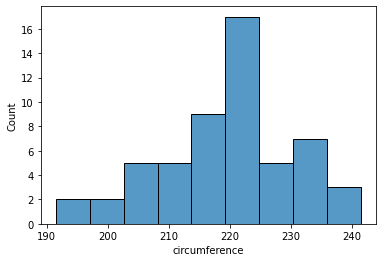

In [7]:
sns.histplot(sample1)

<AxesSubplot:xlabel='circumference', ylabel='Count'>

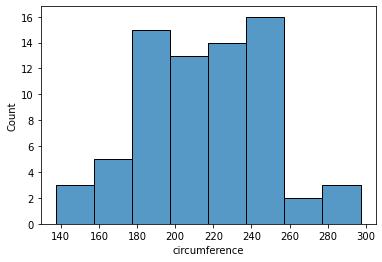

In [8]:
sns.histplot(sample2)

In [9]:
print(sample1.mean())

220.33030198964076


In [10]:
print(sample2.mean())

215.74078148458815


In [13]:
## H0: m1  = m2
## Ha: m1 != m2
ttest_ind(sample1, sample2)

Ttest_indResult(statistic=0.9774319527668726, pvalue=0.3302584162916311)

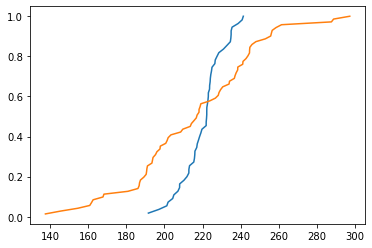

In [18]:
e1 = ECDF(sample1)
e2 = ECDF(sample2)

plt.plot(e1.x, e1.y)
plt.plot(e2.x, e2.y)

In [22]:
# H0: ECDF(sample1)  = ECDF(sample2)
# Ha: ECDF(sample1) != ECDF(sample2)
kstest(sample1, sample2)

KstestResult(statistic=0.33572343149807937, pvalue=0.001268182397711426)

## Coin example - chi-square test

In [31]:
test_stat = 0.72

from scipy.stats import chi2

In [32]:
## chi-square test is always a right tailed test.
p_value = 1 - chi2.cdf(test_stat, df=1)

In [33]:
p_value

0.3961439091520741

In [34]:
critical_value = chi2.ppf(q=0.95, df=1)

In [35]:
critical_value

3.841458820694124

## Dice Example

In [36]:
from scipy.stats import chisquare

chi_stat, p_value = chisquare([28, 22], [25, 25])
print(chi_stat)
print(p_value)

0.72
0.3961439091520741


In [37]:
critical_value = chi2.ppf(q=0.9, df=5)

In [38]:
critical_value

9.236356899781123

In [39]:
exp = [6, 6, 6, 6, 6, 6]
obs = [2, 4, 8, 9, 3, 10]

chi_stat, p_value = chisquare(obs, exp)
print(chi_stat)
print(p_value)

9.666666666666666
0.08525020077588863


## Gender vs. Preference example, Lenskart

In [40]:
critical_value = chi2.ppf(q=0.9, df=1)

In [41]:
critical_value

2.705543454095404

In [43]:
## Use this to perform chi2 test of independence
from scipy.stats import chi2_contingency

observed = [[527, 72], [206, 102]]
expected = [[484, 115], [249, 59]]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed)

In [44]:
p_value

4.268230756875865e-14